In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")
%matplotlib inline

train_df = pd.read_csv(r'C:\Users\안재우\Desktop\CUAI\project1\box_office\train.csv')
test_df = pd.read_csv(r'C:\Users\안재우\Desktop\CUAI\project1\box_office\test.csv')
print(train_df.shape, test_df.shape)
train_df.head()

(3000, 23) (4398, 22)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [256]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [257]:
train_df = train_df[['belongs_to_collection', 'budget', 'genres', 'original_language', 'popularity', 'release_date', 'runtime', 'spoken_languages', 'cast', 'crew', 'revenue']]
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,release_date,runtime,spoken_languages,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]","[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [258]:
isnull_series = train_df.isnull().sum()
print('\n ### Null 칼럼과 그 건수 ### \n', isnull_series[isnull_series>0].sort_values(ascending=False))


 ### Null 칼럼과 그 건수 ### 
 belongs_to_collection    2396
spoken_languages           20
crew                       16
cast                       13
genres                      7
runtime                     2
dtype: int64


#### belongs_to_collection

전작이 있는 작품과 없는 작품으로 분류

In [259]:
train_df['belongs_to_collection'] = train_df['belongs_to_collection'].fillna(0)
train_df['belongs_to_collection'] = train_df['belongs_to_collection'].apply(lambda x : 0 if x == 0 else 1)
train_df['belongs_to_collection'].value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

#### budget

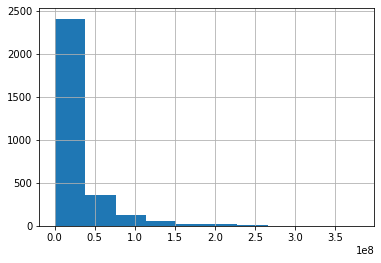

In [260]:
train_df['budget'].hist()

#### original language

영어와 비영어

In [261]:
train_df['original_language'] = train_df['original_language'].apply(lambda x : 1 if x == "en" else 0)
train_df['original_language'].value_counts()

1    2575
0     425
Name: original_language, dtype: int64

#### popularity

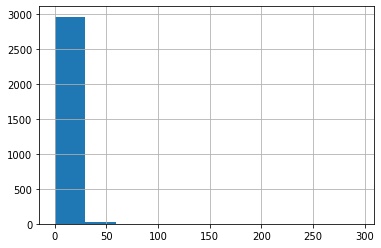

In [262]:
train_df['popularity'].hist()

#### release_date

In [263]:
train_df['release_date'].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [264]:
def date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
train_df['release_date']=train_df['release_date'].apply(lambda x: date(x))

In [265]:
train_df['release_date']=train_df['release_date'].apply(lambda x : pd.datetime.strptime(x, '%m/%d/%Y'))

In [266]:
train_df['release_year']=train_df['release_date'].apply(lambda x : x.year)
train_df['release_month']=train_df['release_date'].apply(lambda x : x.month)
train_df['release_day']=train_df['release_date'].apply(lambda x : x.day)
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,release_date,runtime,spoken_languages,cast,crew,revenue,release_year,release_month,release_day
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",1,6.575393,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,20
1,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1,8.248895,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,6
2,0,3300000,"[{'id': 18, 'name': 'Drama'}]",1,64.299990,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10
3,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",0,3.174936,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,9
4,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,1.148070,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]","[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,5


#### runtime

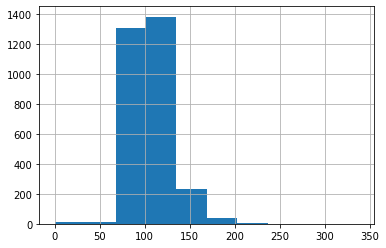

In [267]:
train_df['runtime'].hist()

#### spoken_languages

In [268]:
train_df['spoken_languages'] = train_df['spoken_languages'].astype(str)
train_df['spoken_languages'] = train_df['spoken_languages'].apply(lambda x:x.count("name"))
train_df['spoken_languages'].value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [269]:
train_df['spoken_languages'][train_df['spoken_languages']==0]=1

In [270]:
train_df['spoken_languages'].value_counts()

1    2125
2     549
3     216
4      72
5      23
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

#### cast

In [271]:
train_df['cast'] = train_df['cast'].astype(str)
train_df['cast'] = train_df['cast'].apply(lambda x:x.count("cast_id"))
train_df['cast'].value_counts()

15     212
16     165
10     135
13     129
12     124
      ... 
90       1
88       1
84       1
82       1
134      1
Name: cast, Length: 109, dtype: int64

#### crew

In [272]:
train_df['crew'] = train_df['crew'].astype(str)
train_df['crew'] = train_df['crew'].apply(lambda x:x.count("credit_id"))
train_df['crew'].value_counts()

2      179
11     127
10     126
3      126
12     110
      ... 
126      1
122      1
98       1
96       1
183      1
Name: crew, Length: 153, dtype: int64

#### genres

In [273]:
train_df['genres'] = train_df['genres'].astype(str)
train_df['genres'] = train_df['genres'].apply(lambda x:x.count("name"))
train_df['genres'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

#### revenue

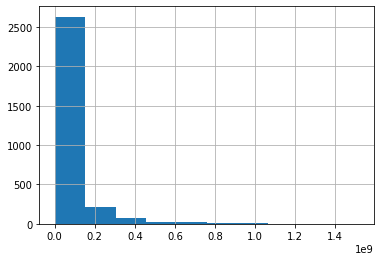

In [274]:
train_df['revenue'].hist()

In [275]:
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,release_date,runtime,spoken_languages,cast,crew,revenue,release_year,release_month,release_day
0,1,14000000,1,1,6.575393,2015-02-20,93.0,1,24,72,12314651,2015,2,20
1,1,40000000,4,1,8.248895,2004-08-06,113.0,1,20,9,95149435,2004,8,6
2,0,3300000,1,1,64.299990,2014-10-10,105.0,1,51,64,13092000,2014,10,10
3,0,1200000,2,0,3.174936,2012-03-09,122.0,2,7,3,16000000,2012,3,9
4,0,0,2,0,1.148070,2009-02-05,118.0,1,4,2,3923970,2009,2,5


In [276]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
belongs_to_collection    3000 non-null int64
budget                   3000 non-null int64
genres                   3000 non-null int64
original_language        3000 non-null int64
popularity               3000 non-null float64
release_date             3000 non-null datetime64[ns]
runtime                  2998 non-null float64
spoken_languages         3000 non-null int64
cast                     3000 non-null int64
crew                     3000 non-null int64
revenue                  3000 non-null int64
release_year             3000 non-null int64
release_month            3000 non-null int64
release_day              3000 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(11)
memory usage: 328.2 KB


In [277]:
train_df = train_df.drop('release_date', axis = 1)
train_df['runtime'] = train_df['runtime'].fillna(train_df['runtime'].mean())
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,runtime,spoken_languages,cast,crew,revenue,release_year,release_month,release_day
0,1,14000000,1,1,6.575393,93.0,1,24,72,12314651,2015,2,20
1,1,40000000,4,1,8.248895,113.0,1,20,9,95149435,2004,8,6
2,0,3300000,1,1,64.299990,105.0,1,51,64,13092000,2014,10,10
3,0,1200000,2,0,3.174936,122.0,2,7,3,16000000,2012,3,9
4,0,0,2,0,1.148070,118.0,1,4,2,3923970,2009,2,5


In [278]:
print('\n ### 학습 데이터 정보 ### \n')
print(train_df.info())
print('\n ### 데이터 세트의 Shape ### \n:', train_df.shape)
print('\n ### 전체 피처의 type ### \n', train_df.dtypes.value_counts())
isnull_series = train_df.isnull().sum()
print('\n ### Null 칼럼과 그 건수 ### \n', isnull_series[isnull_series>0].sort_values(ascending=False))


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
belongs_to_collection    3000 non-null int64
budget                   3000 non-null int64
genres                   3000 non-null int64
original_language        3000 non-null int64
popularity               3000 non-null float64
runtime                  3000 non-null float64
spoken_languages         3000 non-null int64
cast                     3000 non-null int64
crew                     3000 non-null int64
revenue                  3000 non-null int64
release_year             3000 non-null int64
release_month            3000 non-null int64
release_day              3000 non-null int64
dtypes: float64(2), int64(11)
memory usage: 304.8 KB
None

 ### 데이터 세트의 Shape ### 
: (3000, 13)

 ### 전체 피처의 type ### 
 int64      11
float64     2
dtype: int64

 ### Null 칼럼과 그 건수 ### 
 Series([], dtype: int64)


In [279]:
col_names = ['belongs_to_collection', 'budget', 'genres', 'original_language', 'popularity', 'runtime', 'spoken_languages', 'cast', 'crew', 'revenue', 'release_year', 'release_month', 'release_day']
for feature in col_names:
    train_df[feature] = (train_df[feature] - train_df[feature].mean())/train_df[feature].std()

In [280]:
train_df.head()

,belongs_to_collection,budget,genres,original_language,popularity,runtime,spoken_languages,cast,crew,revenue,release_year,release_month,release_day
0,1.991373,-0.230414,-1.346140,0.406194,-0.155972,-0.672880,-0.521307,0.204234,1.697200,-0.395625,0.991162,-1.400755,0.573807
1,1.991373,0.471793,1.339575,0.406194,-0.017711,0.232955,-0.521307,-0.036301,-0.547475,0.206668,0.277956,0.359233,-1.047881
2,-0.501999,-0.519400,-1.346140,0.406194,4.613080,-0.129379,-0.521307,1.827841,1.412162,-0.389973,0.926325,0.945896,-0.584541
3,-0.501999,-0.576116,-0.450902,-2.461057,-0.436908,0.640581,0.614438,-0.818038,-0.761254,-0.368829,0.796651,-1.107423,-0.700376
4,-0.501999,-0.608526,-0.450902,-2.461057,-0.604363,0.459414,-0.521307,-0.998438,-0.796884,-0.456634,0.602140,-1.400755,-1.163715


In [281]:
train_df.describe()

,belongs_to_collection,budget,genres,original_language,popularity,runtime,spoken_languages,cast,crew,revenue,release_year,release_month,release_day
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,9.769963e-17,-7.499557e-17,-7.939945e-17,3.358795e-16,-1.546485e-15,6.180242e-17,-8.496907e-17,4.733251e-17,1.702342e-18,8.969677e-18,2.244353e-15,1.924387e-17,4.418688e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.019988e-01,-6.085259e-01,-2.241378e+00,-2.461057e+00,-6.992129e-01,-4.885015e+00,-5.213069e-01,-1.238973e+00,-8.681431e-01,-4.851649e-01,-5.103508e+00,-1.694086e+00,-1.627055e+00
25%,-5.019988e-01,-6.085259e-01,-4.509017e-01,4.061940e-01,-3.672523e-01,-6.275886e-01,-5.213069e-01,-5.775031e-01,-5.831049e-01,-4.678612e-01,-4.352502e-01,-8.140920e-01,-8.162109e-01
50%,-5.019988e-01,-3.924621e-01,-4.509017e-01,4.061940e-01,-8.992174e-02,-1.746709e-01,-5.213069e-01,-2.768351e-01,-3.693263e-01,-3.629604e-01,2.779558e-01,6.590176e-02,-5.367014e-03
75%,-5.019988e-01,1.747056e-01,4.443366e-01,4.061940e-01,2.005708e-01,4.594138e-01,6.144380e-01,2.042338e-01,1.294905e-01,1.594790e-02,7.318142e-01,9.458955e-01,8.054769e-01
max,1.991373e+00,9.654508e+00,4.025290e+00,4.061940e-01,2.361812e+01,1.042360e+01,8.564652e+00,8.141870e+00,6.044032e+00,1.056357e+01,1.120836e+00,1.532558e+00,1.847990e+00


In [306]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = train_df['revenue']
X_data = train_df.drop('revenue', axis=1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.5)

lr = LinearRegression()
lr.fit(X_train, y_test)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 1.040, RMSE : 1.020
Variance score : -0.046


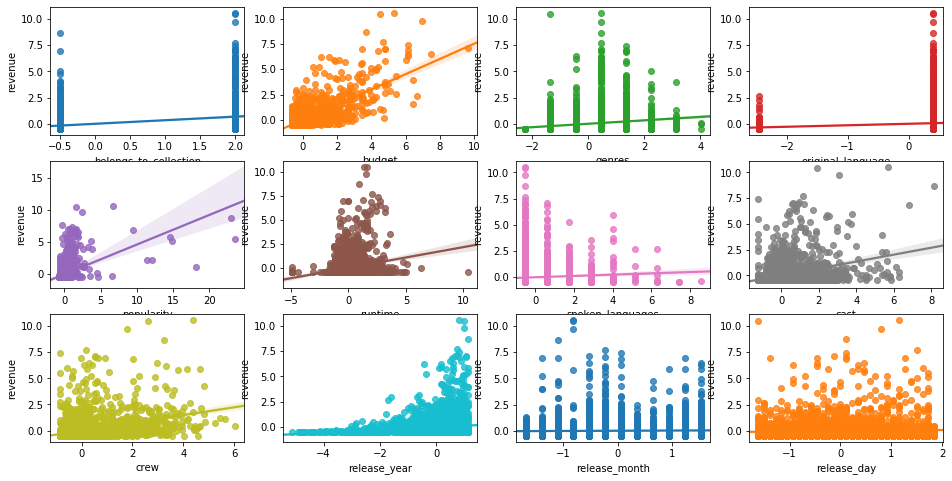

In [307]:
col_names = ['belongs_to_collection', 'budget', 'genres', 'original_language', 'popularity', 'runtime', 'spoken_languages', 'cast', 'crew', 'release_year', 'release_month', 'release_day']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 3)
for i, feature in enumerate(col_names):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='revenue', data=train_df, ax=axs[row][col])

In [311]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 1000)
neg_mse_scores = cross_val_score(rf_reg, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-0.29 -0.38 -0.34 -0.28 -0.29]
 5 교차 검증의 개별 RMSE scores:  [0.54 0.61 0.59 0.53 0.54]
 5 교차 검증의 평균 RMSE: 0.561


In [312]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#### ', model.__class__.__name__, ' ####')
    print(' 5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [314]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

####  DecisionTreeRegressor  ####
 5 교차 검증의 평균 RMSE: 0.669
####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE: 0.559
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE: 0.587
[03:13:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE: 0.584
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE: 0.618


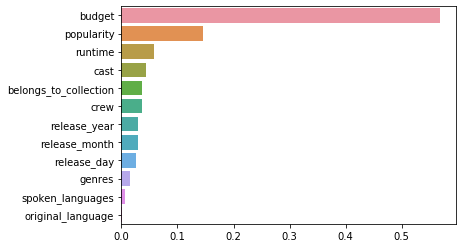

In [315]:
rf_reg = RandomForestRegressor(n_estimators = 1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)